* Python API : https://aws.amazon.com/sdk-for-python/
* Rekognition docs : https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/rekognition.html
* Labels from local file : https://github.com/awsdocs/amazon-rekognition-developer-guide/blob/master/code_examples/python_examples/image/python-detect-labels-local-file.py

In [1]:
import base64
import boto3
import json
import matplotlib.pyplot as plt
%matplotlib inline

def load_api_secrets(filename):
    """Convenience to load the API key from a json file."""
    try:
        with open(filename, 'r') as fp:
            file_contents = json.load(fp)
            return file_contents
    except Exception as exc:
        print(exc)

In [2]:
boto3.__version__

'1.9.69'

In [121]:
imageFile='people.jpg'
#imageFile='dog.jpg'
#imageFile='obama.jpg'

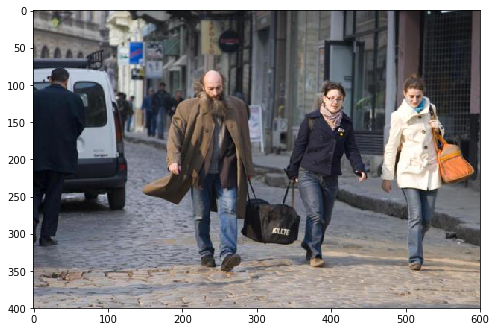

In [122]:
FIG_SIZE = (8, 6)
img = plt.imread(imageFile)
fig, ax = plt.subplots(figsize=FIG_SIZE)
ax.imshow(img);

We authenticate with amazon using a dict:
    
```python
aws_config = {
        CONF_REGION: config.get(CONF_REGION),
        CONF_ACCESS_KEY_ID: config.get(CONF_ACCESS_KEY_ID),
        CONF_SECRET_ACCESS_KEY: config.get(CONF_SECRET_ACCESS_KEY),
    }
```

We can load these credentials from a json file

In [123]:
load_api_secrets("aws-creds.json")

{'region_name': 'us-east-1',
 'aws_access_key_id': 'bla',
 'aws_secret_access_key': 'foo'}

My actual credentials are offline

In [124]:
aws_config = load_api_secrets("/Users/robincole/Desktop/aws-creds.json")
# aws_config

In [125]:
client=boto3.client('rekognition', **aws_config)

## Labels
Post the image file with [detect_labels](https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/rekognition.html#Rekognition.Client.detect_labels)

In [126]:
%%time
with open(imageFile, 'rb') as image:
    response = client.detect_labels(Image={'Bytes': image.read()})
        
print('Detected labels in ' + imageFile)    
for label in response['Labels']:
    print (label['Name'] + ' : ' + str(label['Confidence']))

Detected labels in people.jpg
Apparel : 99.6601333618164
Clothing : 99.6601333618164
Footwear : 99.61605072021484
Shoe : 99.61605072021484
Human : 99.5870590209961
Person : 99.5870590209961
Walking : 99.23701477050781
Pedestrian : 98.68583679199219
Pants : 96.49451446533203
Path : 91.74442291259766
Coat : 87.66629028320312
Jeans : 77.86341094970703
Denim : 77.86341094970703
Overcoat : 76.2469253540039
Sidewalk : 72.11910247802734
Pavement : 72.11910247802734
People : 71.82996368408203
Walkway : 65.95704650878906
Jacket : 59.145469665527344
CPU times: user 19.2 ms, sys: 5.11 ms, total: 24.3 ms
Wall time: 1.38 s


In [128]:
def parse_labels(response):
    """Parse the API labels data."""
    return {label['Name']: round(label['Confidence'], 2)
            for label in response['Labels']}

In [129]:
parse_labels(response)

{'Apparel': 99.66,
 'Clothing': 99.66,
 'Footwear': 99.62,
 'Shoe': 99.62,
 'Human': 99.59,
 'Person': 99.59,
 'Walking': 99.24,
 'Pedestrian': 98.69,
 'Pants': 96.49,
 'Path': 91.74,
 'Coat': 87.67,
 'Jeans': 77.86,
 'Denim': 77.86,
 'Overcoat': 76.25,
 'Sidewalk': 72.12,
 'Pavement': 72.12,
 'People': 71.83,
 'Walkway': 65.96,
 'Jacket': 59.15}

In [134]:
def get_label_data(response, label_string='Person'):
    """Get label data."""
    for label in response['Labels']:
        if label['Name'] == label_string:
            data = {}
            data['Confidence'] = round(label['Confidence'], 2)
            data['Instances'] = len(label['Instances'])
            
            bounding_boxes = []
            for instance in label['Instances']:
                bounding_boxes.append(instance['BoundingBox'])
            
            data['bounding_boxes'] = bounding_boxes
            return data
    return {'Instances':0, 'Confidence':None, 'bounding_boxes':None}

In [135]:
label = get_label_data(response)
label

{'Confidence': 99.59,
 'Instances': 8,
 'bounding_boxes': [{'Width': 0.17915008962154388,
   'Height': 0.6225919127464294,
   'Left': 0.5624061226844788,
   'Top': 0.24082252383232117},
  {'Width': 0.15873366594314575,
   'Height': 0.6689552068710327,
   'Left': 0.7770426869392395,
   'Top': 0.21411465108394623},
  {'Width': 0.12073127925395966,
   'Height': 0.6216476559638977,
   'Left': 0.0,
   'Top': 0.1799827218055725},
  {'Width': 0.044419046491384506,
   'Height': 0.18536704778671265,
   'Left': 0.2675642669200897,
   'Top': 0.2415257692337036},
  {'Width': 0.02575378492474556,
   'Height': 0.15573471784591675,
   'Left': 0.24418003857135773,
   'Top': 0.2608559727668762},
  {'Width': 0.029915643855929375,
   'Height': 0.13185609877109528,
   'Left': 0.19338157773017883,
   'Top': 0.27988821268081665},
  {'Width': 0.03535451367497444,
   'Height': 0.15827690064907074,
   'Left': 0.534134566783905,
   'Top': 0.32034721970558167},
  {'Width': 0.016108907759189606,
   'Height': 0.12